#**Import Library**

In [ ]:
!pip install tensorflow==2.8.3

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.3


In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

#**Download Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # Location of the zip file containing the fish image dataset
# zip_path = '/content/drive/MyDrive/ML CAPSTONE/Dataset_Ikan_Revisi.zip'
# # Location of the directory where the zip file will be extracted
# extract_dir = '/content/drive/MyDrive/CAPSTONE/Dataset_Ikan'
# # Create an 'extract_dir' directory if it does not already exist
# os.makedirs(extract_dir, exist_ok=True)

# # Open the zip file and extract its contents to the 'extract_dir' directory
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#   zip_ref.extractall(extract_dir)

#**Cleaning Dataset**

PIL digunakan untuk memproses gambar, dan cv2 digunakan untuk validasi tambahan gambar menggunakan OpenCV

In [ ]:
# # PIL to extract images and cv2 for additional image validation using OpenCV
# from PIL import Image
# import cv2

# # Directory to save cleaned images
# cleaned_dir = '/content/drive/MyDrive/CAPSTONE/Dataset_Ikan'

# def is_image_valid(image_path):
#     try:
#         # Open image with PIL to check if it's valid
#         img = Image.open(image_path)
#         img.verify()
#         # Open image with OpenCV to ensure it can be processed
#         img_cv = cv2.imread(image_path)
#         if img_cv is None:
#             return False
#         return True
#     except (IOError, SyntaxError):
#         return False

# def process_image(image_path, output_path):
#     try:
#         # Open image with PIL
#         img = Image.open(image_path)
#         # Convert image to RGB (if not already in that mode)
#         img = img.convert('RGB')
#         # Resize image
#         img = img.resize((224, 224))
#         # Save cleaned image
#         img.save(output_path)
#     except Exception as e:
#         print(f"Error processing image {image_path}: {e}")

# # Iterate over each folder and image
# for root, dirs, files in os.walk(extract_dir):
#     for file in files:
#         if file.lower().endswith(('png', 'jpg', 'jpeg')):
#             image_path = os.path.join(root, file)
#             if is_image_valid(image_path):
#                 # Define output path
#                 relative_path = os.path.relpath(image_path, extract_dir)
#                 output_path = os.path.join(cleaned_dir, relative_path)
#                 os.makedirs(os.path.dirname(output_path), exist_ok=True)
#                 # Process and save the cleaned image
#                 process_image(image_path, output_path)
#             else:
#                 print(f"Invalid image found and skipped: {image_path}")

In [ ]:
from PIL import Image
import cv2

folder_path = r'/content/drive/MyDrive/Dataset_Ikan'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

Overall, this code performs image extraction, validation, conversion and storage to ensure the fish image dataset is ready to be used for model training.

#**Organizing Dataset**

In [ ]:
!pip install split-folders

In [ ]:
# A library used to divide a dataset into different sub-folders based on a certain ratio
import splitfolders
# The location of the directory containing the cleaned and processed fish image dataset
input_folder = '/content/drive/MyDrive/Dataset_Ikan'

# Seed to ensure the dataset split is consistent each time the code is run, ensuring the same result each time the split is performed
# group_prefix=None used if we want to group files with the same prefix
splitfolders.ratio(input_folder, output='outputs',
                   seed=42, ratio=(.7, .2, .1),
                   group_prefix=None)

Copying files: 800 files [00:05, 137.22 files/s]


Overall, this code is an important part of the data processing pipeline before training a machine learning model, ensuring the data is broken down proportionally and ready to use for various stages of training and evaluation.

#**Training and Validation Generator**

Sample   Nila:


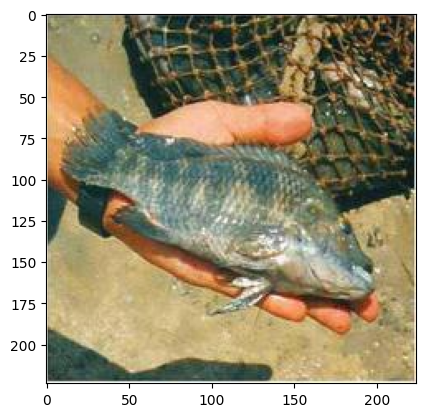

Sample Ikan Mas:


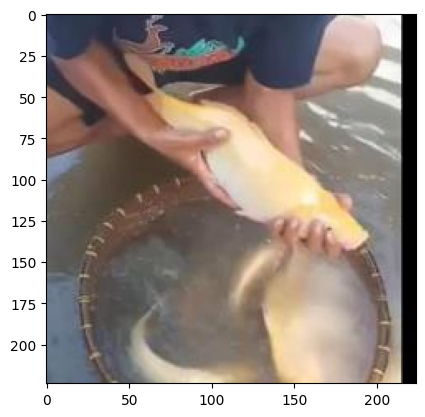

In [ ]:
# Definition of train, val, and test directories
train_dir = './outputs/train'
val_dir = './outputs/val'
test_dir = './ouputs/test'

# Display sample images from the 'Nila' and 'Ikan Mas' categories in the training dataset
print("Sample   Nila:")
nila_img_path = os.path.join('./outputs/train/Nila', os.listdir('./outputs/train/Nila')[0])
plt.imshow(load_img(nila_img_path))
plt.show()

print("Sample Ikan Mas:")
ikanmas_img_path = os.path.join('./outputs/train/Ikan Mas', os.listdir('./outputs/train/Ikan Mas')[0])
plt.imshow(load_img(ikanmas_img_path))
plt.show()

In [ ]:
def train_val_generator(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     fill_mode = 'nearest',
                                     horizontal_flip = True)
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=64,
                                                      class_mode='categorical',
                                                      target_size=(224,224),
                                                      shuffle=True)
  validation_datagen = ImageDataGenerator(rescale=1./255)
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                      batch_size=64,
                                                      class_mode='categorical',
                                                      target_size=(224,224))
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generator(train_dir, val_dir)

Found 560 images belonging to 5 classes.
Found 160 images belonging to 5 classes.


In [ ]:
# Function of TF to create datasets from directories
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=64,
                                             image_size=(224, 224))

Found 560 files belonging to 5 classes.


In [ ]:
class_names = train_dataset.class_names
print(class_names)

['Gabus', 'Ikan Mas', 'Lele', 'Nila', 'Patin']


In [ ]:
# Library to check and confirm the image file type
from pathlib import Path
import imghdr

data_dir = "/content/drive/MyDrive/CAPSTONE/Dataset_Ikan/Dataset_Ikan/outputs"
image_extensions = [".png", ".jpg"]  # list of image file extensions to check

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"] # list of image file types accepted by TF
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath) # check the file type
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

Overall, this code displays image samples from the dataset, creating training and validation data generators with data augmentation to improve model performance. Checks image file types in the dataset to ensure all image files are valid and usable by TensorFlow.

#**Build Model**

In [ ]:
# model = tf.keras.models.Sequential([
#     # This is the first convolution
#     tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (224, 224, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The third convolution
#     tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The fourth convolution
#     tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation = 'relu'),
#     tf.keras.layers.Dense(5, activation='softmax')
# ])

# model.summary()

In [ ]:
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# history = model.fit(train_generator,
#                     epochs=100,
#                     steps_per_epoch=2,
#                     validation_data=validation_generator,
#                     verbose=2,
#                     validation_steps=2)

In [ ]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc=0)
# plt.figure()

# plt.plot(epochs, loss, 'r', label='loss')
# plt.plot(epochs, val_loss, 'b', label='val_loss')
# plt.title('loss and validation loss')
# plt.legend(loc=0)
# plt.figure()
# plt.show()

Overall, this code defines a Convolutional Neural Network (CNN) model designed to classify fish images into five different categories. The input image goes through several convolution and pooling layers to extract features. The output of the convolution layer is flattened and goes through dense layers for final classification. Dropout to prevent overfitting.

#**Transfer Learning**

**Using pre trained model InceptionV3**

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-06-06 12:25:23--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.180.207, 74.125.126.207, 74.125.132.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.180.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   182MB/s    in 0.5s    

2024-06-06 12:25:24 (182 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def create_pre_trained_model(local_weights_file):

  pre_trained_model = InceptionV3(weights='imagenet',
                              include_top=False,
                              input_shape=(224, 224, 3))

  #pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layers in pre_trained_model.layers:
    layers.trainable = False

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
# pre_trained_model.summary()

87924736/87910968 [==============================] - 1s 0us/step


Overall, this code prepares a pre-trained InceptionV3 model to be used as a basis for building a new model for the task of fish image classification. This model will not retrain the base layers of InceptionV3, but only additional layers added on top of it.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.96):
      print("\nReached 96% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
def output_of_last_layer(pre_trained_model):

  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 12, 12, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 12, 12, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [ ]:
x = keras.layers.Flatten()(last_output)
x = keras.layers.Dense (256, activation='relu')(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense (5, activation='softmax')(x)
model2 = Model(pre_trained_model.input, x)
# model2.summary()

model2.compile(optimizer=keras.optimizers.Adam(0.0001),  # Low learning rate
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
callbacks = myCallback()
history = model2.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    steps_per_epoch = 2,
                    verbose = 2,
                    callbacks = [callbacks]
                    )

Epoch 1/80
2/2 - 51s - loss: 1.7581 - accuracy: 0.2109 - val_loss: 1.5194 - val_accuracy: 0.4000 - 51s/epoch - 26s/step
Epoch 2/80
2/2 - 41s - loss: 1.5739 - accuracy: 0.3672 - val_loss: 1.3745 - val_accuracy: 0.4688 - 41s/epoch - 20s/step
Epoch 3/80
2/2 - 50s - loss: 1.3078 - accuracy: 0.5469 - val_loss: 1.0475 - val_accuracy: 0.6500 - 50s/epoch - 25s/step
Epoch 4/80
2/2 - 54s - loss: 1.1951 - accuracy: 0.5469 - val_loss: 0.8868 - val_accuracy: 0.7000 - 54s/epoch - 27s/step
Epoch 5/80
2/2 - 39s - loss: 0.9763 - accuracy: 0.6719 - val_loss: 0.8191 - val_accuracy: 0.6938 - 39s/epoch - 20s/step
Epoch 6/80
2/2 - 39s - loss: 0.8119 - accuracy: 0.6797 - val_loss: 0.6971 - val_accuracy: 0.7188 - 39s/epoch - 20s/step
Epoch 7/80
2/2 - 37s - loss: 0.7514 - accuracy: 0.7232 - val_loss: 0.6243 - val_accuracy: 0.7688 - 37s/epoch - 19s/step
Epoch 8/80
2/2 - 37s - loss: 0.7436 - accuracy: 0.7054 - val_loss: 0.5912 - val_accuracy: 0.7812 - 37s/epoch - 19s/step
Epoch 9/80
2/2 - 38s - loss: 0.6446 - ac

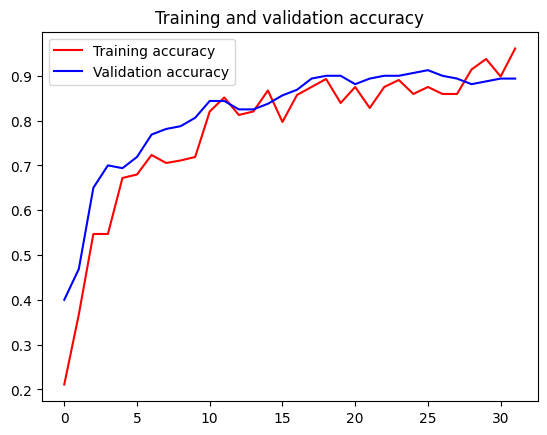

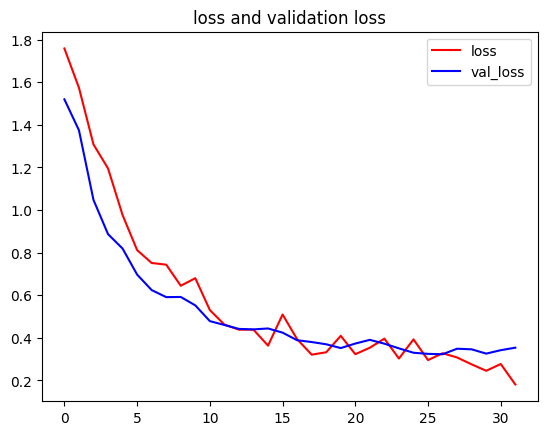

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('loss and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

Overall, this code uses a transfer learning approach with pre-trained InceptionV3, adds a fully connected layer for classification, and compiles a new model for further training. This model is expected to achieve high accuracy by utilizing the features that have been learned by InceptionV3.

#**Fine Tuning**

In [ ]:
from tensorflow import keras
pre_trained_model.trainable = True


model2.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
                loss = keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy']
)

epochs = 15
model2.fit(train_generator,
           validation_data=validation_generator,
          epochs=epochs
         )

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


9/9 [==============================] - 354s 38s/step - loss: 0.3844 - accuracy: 0.8607 - val_loss: 0.4051 - val_accuracy: 0.8813
Epoch 2/15
9/9 [==============================] - 343s 38s/step - loss: 0.3290 - accuracy: 0.9018 - val_loss: 0.3595 - val_accuracy: 0.9125
Epoch 3/15
9/9 [==============================] - 340s 38s/step - loss: 0.3146 - accuracy: 0.8911 - val_loss: 0.3479 - val_accuracy: 0.9062
Epoch 4/15
9/9 [==============================] - 372s 40s/step - loss: 0.2456 - accuracy: 0.9161 - val_loss: 0.3455 - val_accuracy: 0.9125
Epoch 5/15
9/9 [==============================] - 380s 44s/step - loss: 0.2306 - accuracy: 0.9089 - val_loss: 0.3330 - val_accuracy: 0.9187
Epoch 6/15
9/9 [==============================] - 341s 38s/step - loss: 0.2046 - accuracy: 0.9429 - val_loss: 0.3230 - val_accuracy: 0.9250
Epoch 7/15
9/9 [==============================] - 344s 38s/step - loss: 0.1978 - accuracy: 0.9321 - val_loss: 0.3081 - val_accuracy: 0.9187
Epoch 8/15
9/9 [===============

Overall, this code fine-tunes the pre-trained InceptionV3 model by adding a fully connected layer and training the new model on the fish dataset. By using a low learning rate and a data generator, the model is expected to learn well and achieve high accuracy on image classification tasks.

#**Checking Accuracy Model**

In [ ]:
import splitfolders
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Define your class names
class_names = ['Gabus', 'Ikan Mas', 'Lele', 'Nila' ,'Patin']

# Path to the test set folder
test_folder = '/content/drive/MyDrive/Dataset_Ikan'

# Load test images and labels
test_images = []
test_labels = []

for class_name in os.listdir(test_folder):
    class_folder = os.path.join(test_folder, class_name)
    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)
        test_images.append(img_path)
        test_labels.append(class_names.index(class_name))

# Initialize counters for correct and total predictions
correct_predictions = 0
total_predictions = len(test_images)

# Predict and evaluate
for img_path, true_label in zip(test_images, test_labels):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x /= 255  # Normalize
    x = np.expand_dims(x, axis=0)  # Add a new axis to create a batch with one image
    images = np.vstack([x])  # Create a batch of images

    # Predict the class of the image
    classes = model2.predict(images, batch_size=10)
    predicted_class = np.argmax(classes, axis=1)[0]

    # Compare the predicted class with the true class
    if predicted_class == true_label:
        correct_predictions += 1
    # Print actual and predicted classes
    print(f'Actual: {class_names[true_label]}, Predicted: {class_names[predicted_class]}')

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print(f'Accuracy: {accuracy:.2f}')

Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: Patin, Predicted: Patin
Actual: 

This code performs classification predictions using a pre-trained model (model2). To see whether the model can perform classification correctly and see the level of accuracy.

#**Test Model**

index 0
probability 0.9903792


Text(0.5, 1.0, 'Result: Gabus')

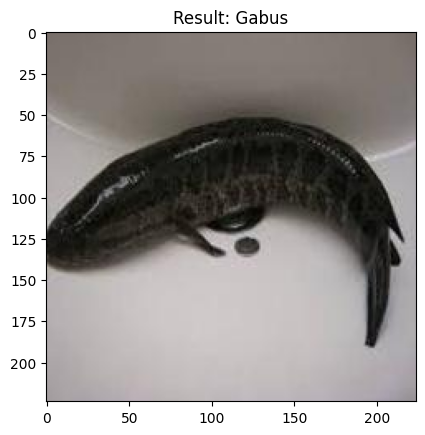

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model

# Define your class names
class_names = ['Gabus', 'Ikan Mas', 'Lele', 'Nila', 'Patin']

# Confidence threshold
threshold = 0.6  # You can adjust this value

img = load_img('/content/outputs/test/Gabus/SnakeHead 117.jpg', target_size=(224, 224))


x = img_to_array(img)
x /= 255  # Normalize
images = np.expand_dims(x, axis=0)  # Add a new axis to create a batch with one image
# images = np.vstack([x])  # Create a batch of images

# Predict the class probabilities
classes = model2.predict(images, batch_size=64)
predicted_class_index = np.argmax(classes, axis=1)[0]
predicted_class_probability = np.max(classes, axis=1)[0]
print("index", predicted_class_index)
print("probability", predicted_class_probability)

# Determine if the image is recognized or not
if predicted_class_probability < threshold:
  result = "gambar tidak dikenali"
else:
  result = class_names[predicted_class_index]

# Display the image and prediction
# ax.axis('Off')  # Don't show axes
plt.imshow(img)
plt.title('Result: ' + result)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from google.colab import files
# from tensorflow.keras.utils import load_img, img_to_array
# from tensorflow.keras.models import load_model

# # Load your model
# #loaded_model = load_model('/content/drive/MyDrive/CAPSTONE/Dataset_Ikan/model.h5')

# # Upload images
# uploaded = files.upload()

# # Define your class names
# class_names = ['Gabus', 'Ikan Mas', 'Lele', 'Nila', 'Patin']

# # Confidence threshold
# threshold = 0.6  # You can adjust this value

# # Determine the number of rows and columns for the subplot grid
# num_images = len(uploaded)
# num_cols = 5  # Number of columns you want in the grid
# num_rows = (num_images // num_cols) + (1 if num_images % num_cols != 0 else 0)

# fig = plt.figure(figsize=(20, 12))  # Create a new figure with size 20*12 inches to display images and predictions

# # Predict and display images
# for i, fn in enumerate(uploaded.keys()):
#     # Determine path to the uploaded image
#     path = '/content/' + fn
#     img = load_img(path, target_size=(224, 224))

#     # Convert image to numpy array
#     x = img_to_array(img)
#     x /= 255  # Normalize
#     x = np.expand_dims(x, axis=0)  # Add a new axis to create a batch with one image
#     images = np.vstack([x])  # Create a batch of images

#     # Predict the class probabilities
#     classes = model2.predict(images, batch_size=64)
#     predicted_class_index = np.argmax(classes, axis=1)[0]
#     predicted_class_probability = np.max(classes, axis=1)[0]

#     # Determine if the image is recognized or not
#     if predicted_class_probability < threshold:
#         result = "gambar tidak dikenali"
#     else:
#         result = class_names[predicted_class_index]

#     # Display the image and prediction
#     ax = fig.add_subplot(num_rows, num_cols, i + 1)
#     ax.axis('Off')  # Don't show axes
#     plt.imshow(img)
#     plt.title('Result: ' + result)

# plt.show()

#**Download Model**

In [ ]:
# Save the model in HDF5 format
model2.save('/content/drive/MyDrive/CAPSTONE/Model-ML/model.h5')

In [ ]:
# Save the model in saved_model (.pb) format
tf.saved_model.save(model2, '/content/drive/MyDrive/CAPSTONE/Model-ML/saved_model')

In [ ]:
# Save the model in pickle format (.pkl)
import pickle
filename='/content/drive/MyDrive/CAPSTONE/Model-ML/model.pkl'

pickle.dump(model2, open(filename, 'wb'))

In [ ]:
path_uji = "/content/drive/MyDrive/Dataset_Ikan/Gabus/G100_11zon.jpg"

index 0
probability 0.9196816


Text(0.5, 1.0, 'Result: Gabus')

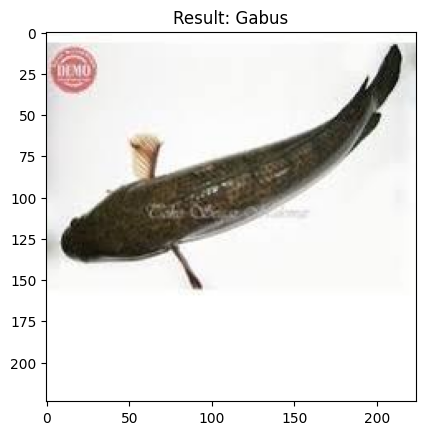

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
# No need for load_model from Keras since we're using SavedModel

# Define your class names
class_names = ['Gabus', 'Ikan Mas', 'Lele', 'Nila', 'Patin']

# Confidence threshold
threshold = 0.6  # You can adjust this value

img = load_img(path_uji, target_size=(224, 224))

# Convert image to numpy array
x = img_to_array(img)
x /= 255  # Normalize
images = np.expand_dims(x, axis=0)  # Add a new axis to create a batch with one image

# Load the SavedModel
model_path = '/content/drive/MyDrive/CAPSTONE/Model-ML/saved_model'
model = tf.saved_model.load(model_path)

# Access input and output tensors from the default serving signature
input_tensor = model.signatures['serving_default'].inputs[0]
output_tensor = model.signatures['serving_default'].outputs[0]

# Predict the class probabilities
predictions = model(images)  # This uses the defined tensors

predicted_class_index = np.argmax(predictions)
predicted_class_probability = np.max(predictions)
print("index", predicted_class_index)
print("probability", predicted_class_probability)

result = class_names[predicted_class_index]

plt.imshow(img)
plt.title('Result: ' + result)


1/1 [==============================] - 2s 2s/step
index 0
probability 0.9196816


Text(0.5, 1.0, 'Result: Gabus')

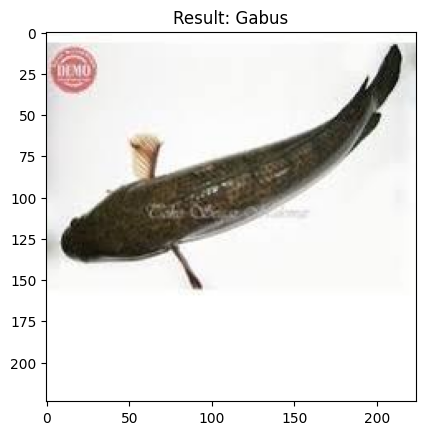

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model

# Define your class names
class_names = ['Gabus', 'Ikan Mas', 'Lele', 'Nila', 'Patin']

# Confidence threshold
threshold = 0.6  # You can adjust this value

img = load_img(path_uji, target_size=(224, 224))

# Convert image to numpy array
x = img_to_array(img)
x /= 255  # Normalize
images = np.expand_dims(x, axis=0)  # Add a new axis to create a batch with one image

model = tf.keras.models.load_model('/content/drive/MyDrive/CAPSTONE/Model-ML/model.h5')

# Predict the class probabilities
classes = model.predict(images)

predicted_class_index = np.argmax(classes)
predicted_class_probability = np.max(classes)
print("index", predicted_class_index)
print("probability", predicted_class_probability)

result = class_names[predicted_class_index]

plt.imshow(img)
plt.title('Result: ' + result)


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from google.colab import files
# from tensorflow.keras.utils import load_img, img_to_array
# from tensorflow.keras.models import load_model
# import pickle

# # Define your class names
# class_names = ['Gabus', 'Ikan Mas', 'Lele', 'Nila', 'Patin']

# # Confidence threshold
# threshold = 0.6  # You can adjust this value

# img = load_img(path_uji, target_size=(224, 224))

# # Convert image to numpy array
# x = img_to_array(img)
# x /= 255  # Normalize
# images = np.expand_dims(x, axis=0)  # Add a new axis to create a batch with one image
# # images = np.vstack([x])  # Create a batch of images

# model = pickle.load(open('/content/drive/MyDrive/CAPSTONE/Model-ML/model.pkl', 'rb'))

# classes = model2.predict(images, batch_size=64)
# predicted_class_index = np.argmax(classes, axis=1)[0]
# predicted_class_probability = np.max(classes, axis=1)[0]
# print("index", predicted_class_index * 100)
# print("probability", predicted_class_probability)

# result = class_names[predicted_class_index]

# plt.imshow(img)
# plt.title('Result: ' + result)


#**Convert Model to tfjs**

In [ ]:
!pip install tensorflowjs==2.8.3

  Using cached tensorflowjs-2.8.3-py3-none-any.whl (63 kB)
  Using cached h5py-2.10.0.tar.gz (301 kB)
  Preparing metadata (setup.py) ... done
  Using cached tensorflow_hub-0.9.0-py2.py3-none-any.whl (103 kB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-2.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
  Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl (441 kB)
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Using cached google_auth_oauthlib-1.2.0-py2.py3-none-any.whl (24 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for h5py
  Running

In [ ]:
!tensorflowjs_converter --input_format=keras /content/drive/MyDrive/CAPSTONE/Model-ML/model.h5 /content/drive/MyDrive/CAPSTONE/Model-ML/tfjs_model


2024-06-06 14:55:29.897347: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-06 14:55:33.198349: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
import tensorflowjs as tfjs
print(tfjs.__version__)

4.20.0
